In [1]:
import os
import pdb
import random

from openai import OpenAI
from datasets import load_dataset

## Helper Functions

In [ ]:
class LLM:

    def __init__(self, model):
        self.llm = OpenAI(api_key=os.getenv("OPENAI_KEY"))
        self.model = model

    def response(self, chat, temp=0, max_tokens=500):
        response = self.llm.chat.completions.create(model=self.model,
                                                        messages=chat,
                                                        temperature=temp,
                                                        max_tokens=max_tokens)
        return response.choices[0].message.content

## Part 1: Evaluate accuracy using LLM alone

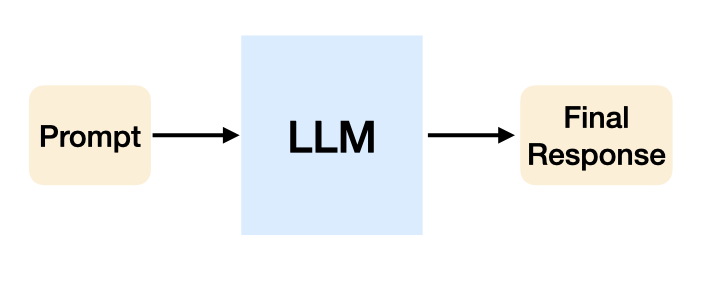

In [4]:
def eval_llm(llm, dataset, use_statute=True):
    acc = 0.0
    for dp in dataset:

        if use_statute:
            prompt = """
            Consider statutory law for {state} in the year 2021. Read the following statute excerpts which govern housing law in this state, and answer the question below.

            Statutes ##################

            {statute_list}

            Question ##################

            {question}
            Answer "Yes" or "No".
            Answer:
            """
        else:
            prompt = """
            Consider statutory law for {state} in the year 2021. Answer the question below.

            Question ##################

            {question}
            Answer "Yes" or "No".
            Answer:
            """

        # Complete this part
        raise NotImplementedError()

        prediction = None

        if prediction == dp["answer"]:
            acc += 1

    acc = (acc * 100.0) / float(len(dataset))

    return acc

## Part 2: Evaluate your retrieval system

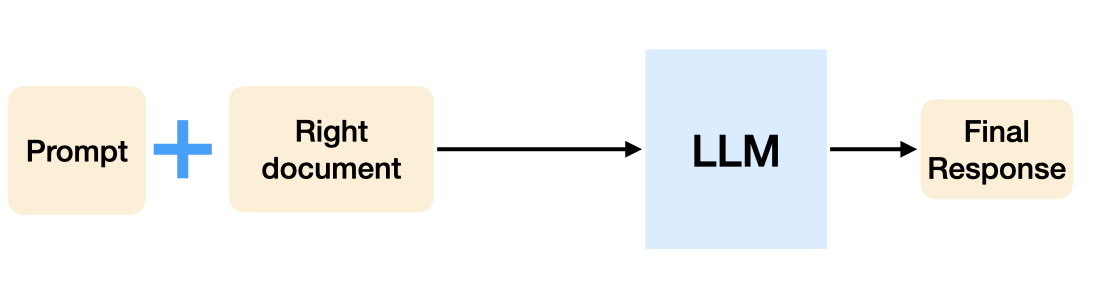

In [5]:
def predicted_retrieval(question, statutes, retrieval_type="ngram"):
    """
    :param question:
    :param statutes:
    :param retrieval_type:
    :return: index of the statute in the list which is the chosen one
    """
    assert retrieval_type in ["ngram", "cosine"]
    # for ngram, use some ngram style similarity
    # for cosine, use embedding and then cosine similarity -- you can use any embedding model
    # Complete this part
    raise NotImplementedError()

In [6]:
def eval_retrieval(dataset, retrieval_type="ngram"):
    acc = 0
    # You are given a list of statutes, you need to predict the right one using some retrieval score
    for dp in dataset:
        question = dp["question"]
        statutes = dp["statutes"]

        predicted_ix = predicted_retrieval(question, statutes)

        if predicted_ix == 0:
            acc += 1

    acc = (acc * 100.0) / float(len(dataset))

    return acc

##Part 3: Evaluate the retrieval system: LLM accuracy + Retrieval accruacy put together

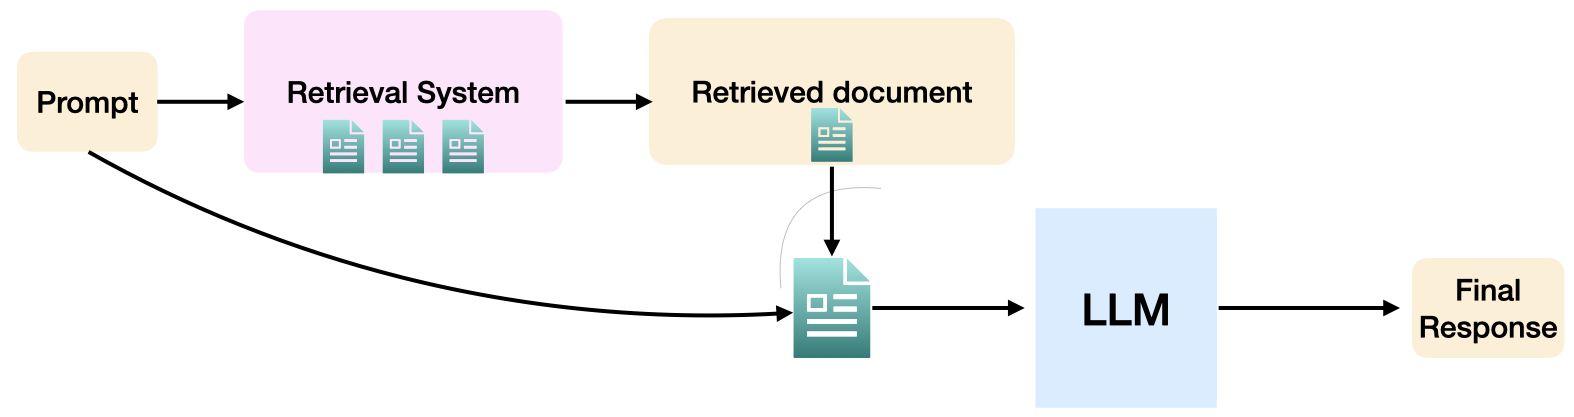

In [7]:
def eval_full_pipeline(dataset):
    acc = 0
    for dp in dataset:
        question = dp["question"]
        statutes = dp["statutes"]

        predicted_ix = predicted_retrieval(question, statutes)
        predicted_statute = statutes[predicted_ix]

        # Complete this part
        raise NotImplementedError()

# Run everything

In [ ]:
def main():
    # Generate dataset
    dataset, dataset_statute = create_dataset()

    llm = LLM(model="TODO")

    # Evaluate LLM with and without statues
    eval_score_wo_statute = eval_llm(llm, dataset, use_statute=False)
    eval_score = eval_llm(llm, dataset, use_statute=True)

    print(f"LLM accuracy without using statute is {eval_score_wo_statute}%")
    print(f"LLM accuracy using statute is {eval_score}%")

    # Select the best statues for each datapoint from a list using a simple n-gram heuristic
    eval_retrieval(dataset_statute, retrieval_type="ngram")

    # Select the best statues for each datapoint from a list using vector similarity
    eval_retrieval(dataset_statute, retrieval_type="cosine")

    # Putting it together, retrieva and then answer
    eval_full_pipeline(dataset_statute)

    pdb.set_trace()